Simple notebook for testing API requests.

https://home-assistant.io/developers/rest_api/

In [1]:
import requests
import shutil
import json
from pprint import PrettyPrinter
import matplotlib.pyplot as plt
%matplotlib inline

def print_json(json_data):
    PrettyPrinter().pprint(json_data)

headers = {'content-type': 'application/json'}

In [2]:
ip = '192.168.0.28'  # The IP adress of my test HA instance

In [3]:
request = 'http://{}:8123/api/states/binary_sensor.front_door'.format(ip)
print(request)

http://192.168.0.28:8123/api/states/binary_sensor.front_door


In [4]:
response = requests.get(request, headers=headers).json()
print_json(response)

{'attributes': {'friendly_name': 'Front door', 'icon': 'mdi:door'},
 'entity_id': 'binary_sensor.front_door',
 'last_changed': '2018-02-07T18:46:50.867066+00:00',
 'last_updated': '2018-02-07T18:46:50.867066+00:00',
 'state': 'off'}


In [5]:
response['state']

'off'

The equivalent [restful binary sensor](https://home-assistant.io/components/binary_sensor.rest/) is:

```yaml
- platform: rest
  scan_interval: 1
  resource: http://192.168.0.28:8123/api/states/binary_sensor.front_door
  name: front_door
  value_template: '{{value_json.state}}'
```

# Camera
https://home-assistant.io/developers/rest_api/#get-apicamera_proxycameraltentity_id

In [6]:
request = 'http://{}:8123/api/camera_proxy/camera.last_captured_motion'.format(ip)
print(request)

http://192.168.0.28:8123/api/camera_proxy/camera.last_captured_motion


In [9]:
response = requests.get(request, stream=True)
with open('img.jpg', 'wb') as out_file:
    shutil.copyfileobj(response.raw, out_file)

In [10]:
ls

HA API request 6-2-2018.ipynb  img.jpg


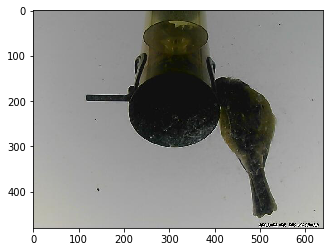

In [11]:
img = plt.imread('img.jpg')
plt.imshow(img);

In [13]:
response.raw

In [15]:
image_path = 'img.jpg'
with open(image_path, 'rb') as file:
    file.read()  # Read and return up to n bytes.